In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

* If structured data (CSV's) use ensemble methods
* If unstructured data (Audio, image) use deep/transfer learning

# 1. Getting data ready

1. Split data into X and y
2. Fill/imputate/remove missing values
3. Convert non-numerical to numerical (feature encoding)

In [3]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [4]:
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

### One Hot Encode categorical features

In [17]:
car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [19]:
car_sales['Make'].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [18]:
car_sales['Colour'].value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [20]:
# Total 13 columns should be produced once one hot encoded (Odometer included)

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [('one_hot', one_hot, categorical_features)],
    remainder='passthrough'
)

transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [22]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [23]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [24]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3385921048142325

### Handle data with missing values

In [49]:
car_sales_missing = pd.read_csv('car-sales-extended-missing.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [27]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [35]:
print(X.isna().sum())
print('')
print(y.isna().sum())

Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64

50


In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [('one_hot', one_hot, categorical_features)],
    remainder='passthrough'
)

transformed_X = transformer.fit_transform(car_sales_missing)
pd.DataFrame(transformed_X)

# Result has one hot encoded the "" value

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [51]:
# Fill missing categorical values with extra category (Not possible to take mean)
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill doors with value that occurs the most
car_sales_missing['Doors'].fillna(4, inplace=True)

In [52]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [53]:
# Remove rows with missing labels (Not practical to predict the prediction)
car_sales_missing.dropna(inplace=True)

In [54]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [55]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [56]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [('one_hot', one_hot, categorical_features)],
    remainder='passthrough'
)

transformed_X = transformer.fit_transform(car_sales_missing)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [72]:
# Secondary method
car_sales_missing = pd.read_csv('car-sales-extended-missing.csv')
car_sales_missing.dropna(subset=['Price'], inplace=True)

In [73]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [74]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

category_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
numerical_imputer = SimpleImputer(strategy='mean')

imputer = ColumnTransformer([
    ('category_imputer', category_imputer, ['Make', 'Colour']),
    ('door_imputer', door_imputer, ['Doors']),
    ('numerical_imputer', numerical_imputer, ['Odometer (KM)']),
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [75]:
car_sales_filled = pd.DataFrame(filled_X, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

In [76]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [('one_hot', one_hot, categorical_features)],
    remainder='passthrough'
)

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [79]:
np.random.seed(0)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.1685441749554657

# 2. Picking the right model

<img src="https://scikit-learn.org/stable/_static/ml_map.png" />

### For a regression model

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# There is an ethical issue with the above method
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
feature_names = np.array([
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
])

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston_df = pd.DataFrame(data, columns=feature_names)
boston_df['target'] = target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
boston_df.size

7084

In [13]:
from sklearn.linear_model import Ridge
np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6662221670168522

In [6]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [14]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8654448653350507

In [15]:
from sklearn.ensemble import AdaBoostRegressor
np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = AdaBoostRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8402444860769022

### For a classification model

In [16]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
heart_disease.size

4242

In [23]:
from sklearn.svm import LinearSVC
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)

model.score(X_test, y_test)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8688524590163934

In [25]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6885245901639344

In [26]:
from sklearn.svm import SVC
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SVC()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7049180327868853

In [27]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8524590163934426

# 3. Create predictions

## For a regression model

In [47]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X_boston = boston_df.drop('target', axis=1)
y_boston = boston_df['target']

X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2)

model_boston = RandomForestRegressor()
model_boston.fit(X_train_boston, y_train_boston)

model_boston.score(X_test_boston, y_test_boston)

0.8654448653350507

In [48]:
preds_boston = model_boston.predict(X_test_boston)

In [46]:
preds_boston

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [49]:
preds_boston

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

## For a classification model

In [35]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X_heart = heart_disease.drop('target', axis=1)
y_heart = heart_disease['target']

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2)

model_heart = RandomForestClassifier()
model_heart.fit(X_train_heart, y_train_heart)

model_heart.score(X_test_heart, y_test_heart)

0.8524590163934426

In [37]:
preds_heart = model_heart.predict(X_test_heart)

In [77]:
proba_heart = model_heart.predict_proba(X_test_heart)

In [41]:
model_heart.predict(X_test_heart)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

# 4. Evaluate model

* Preferrable to use cross val score over the basic '.score'. This prevents luck (many info in train data than thought) from interferring (by doing K number of train test splits) - since the model is trained on all of the data
<img src='cross-val-score.png' />

In [113]:
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [67]:
boston_cross_val_score = cross_val_score(model_boston, X_train_boston, y_train_boston)

In [59]:
model_boston.score(X_test_boston, y_test_boston)

0.8654448653350507

In [68]:
heart_cross_val_score = cross_val_score(model_heart, X_train_heart, y_train_heart)

In [61]:
model_heart.score(X_test_heart, y_test_heart)

0.8524590163934426

### For a classification model

* Accuracy
* AUC/ROC Curve - comparison of a model's TP rate vs the FP rate
* Confusion Matrix
* Classification Report

In [73]:
model_heart_cross_accuracy = np.mean(heart_cross_val_score)
f'{model_heart_cross_accuracy * 100:.3f}%'

'81.412%'

In [80]:
proba_heart[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [81]:
proba_heart[:5,1]

array([0.11, 0.51, 0.57, 0.16, 0.82])

In [83]:
fpr, tpr, thresholds = roc_curve(y_test_heart, proba_heart[:,1])

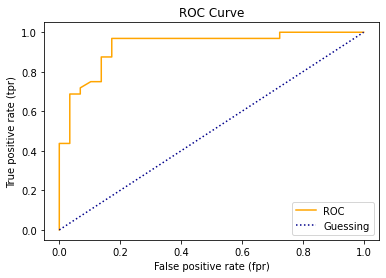

In [93]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    # ROC curvea
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Just a linear line
    plt.plot([0, 1], [0, 1], color='darkblue', label='Guessing', linestyle=':')
    
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [121]:
roc_auc_score_heart = roc_auc_score(y_test_heart, proba_heart[:,1])
roc_auc_score_heart

0.9304956896551724

In [122]:
plot_roc_heart = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score_heart)

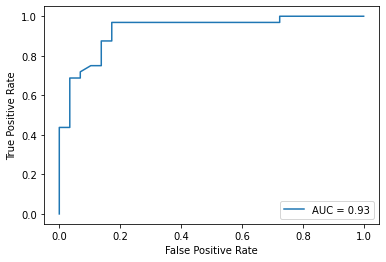

In [123]:
plot_roc_heart.plot();

In [111]:
confusion_heart = confusion_matrix(y_test_heart, preds_heart)
confusion_heart

array([[24,  5],
       [ 4, 28]], dtype=int64)

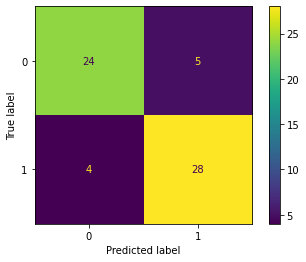

In [119]:
plot_confusion_heart = ConfusionMatrixDisplay(confusion_heart)
plot_confusion_heart.plot();

<img src='classification-report-anatomy.png' />

In [124]:
print(classification_report(y_test_heart, preds_heart))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### For a regression model
* R-squared/coefficient of determination - amount of variance in predictions
* Mean Absolute Error (MAE) - Avg of absolute differences
* Mean Squared Error (MSE) - Avg of squared differences

<img src="regression-evaluation.png" />

In [125]:
model_boston.score(X_test_boston, y_test_boston)

0.8654448653350507

In [128]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [127]:
r2_score(y_test_boston, preds_boston)

0.8654448653350507

In [129]:
mean_absolute_error(y_test_boston, preds_boston)

2.136382352941176

In [130]:
mean_squared_error(y_test_boston, preds_boston)

9.867437068627442